In [129]:
import pandas as pd


In [130]:
data ={
    'City':['Kathmandu','Pokhara','Lalitpur'],
    'Population':[100000,200000,300000]
}
df = pd.DataFrame(data)
df.head()

,City,Population
0,Kathmandu,100000
1,Pokhara,200000
2,Lalitpur,300000


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        3 non-null      object
 1   Population  3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 176.0+ bytes


In [132]:
df.isnull().sum()

City          0
Population    0
dtype: int64

In [133]:
df.describe()

,Population
count,3.0
mean,200000.0
std,100000.0
min,100000.0
25%,150000.0
50%,200000.0
75%,250000.0
max,300000.0


<Axes: xlabel='City'>

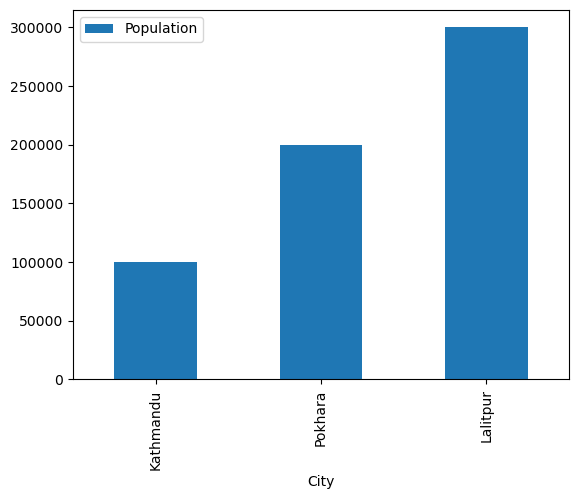

In [134]:

df.plot.bar(x='City',y="Population")

<Figure size 1000x600 with 0 Axes>

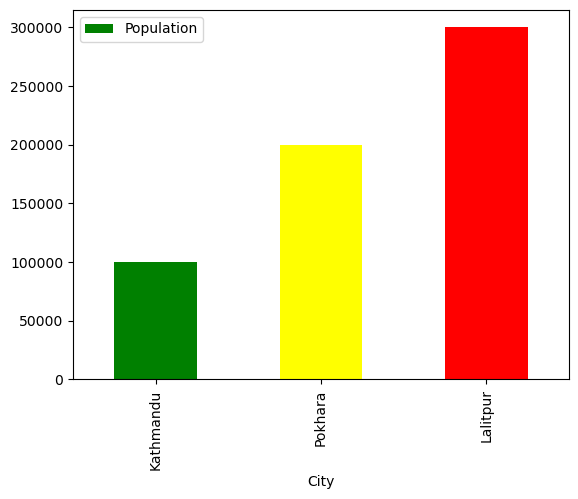

In [135]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,6))
df.plot.bar(x='City',y='Population',color=['green','yellow','red'])
plt.show()

<Axes: ylabel='Population'>

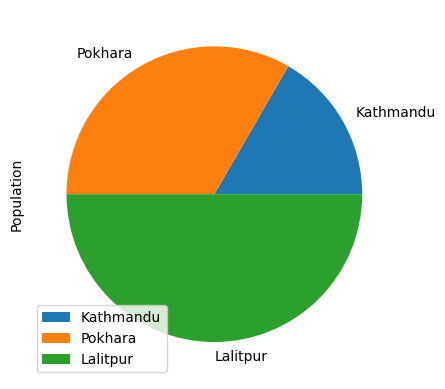

In [136]:
df.plot.pie(y='Population',labels=df['City'])

In [137]:
df_students = pd.DataFrame({
    'StudentId':[1,2,3],
    'Name':['Ram','Shyam','Sita']
})


In [138]:
marks = pd.DataFrame({
    'StudentId':[1,2,4],
    'Marks':[34,45,23]
})

In [139]:
print(df_students) 


   StudentId   Name
0          1    Ram
1          2  Shyam
2          3   Sita


In [140]:
marks

,StudentId,Marks
0,1,34
1,2,45
2,4,23


In [141]:
df_inner = pd.merge(df_students,marks,on='StudentId',how="inner")
df_inner

,StudentId,Name,Marks
0,1,Ram,34
1,2,Shyam,45


In [142]:
df_left = df_students.merge(marks,on='StudentId',how='left')
df_left

,StudentId,Name,Marks
0,1,Ram,34.0
1,2,Shyam,45.0
2,3,Sita,NaN


In [143]:
df_right = df_students.merge(marks,on='StudentId',how='right')
df_right

,StudentId,Name,Marks
0,1,Ram,34
1,2,Shyam,45
2,4,NaN,23


In [144]:
df_outer = df_students.merge(marks,on='StudentId',how='outer')
df_outer

,StudentId,Name,Marks
0,1,Ram,34.0
1,2,Shyam,45.0
2,3,Sita,NaN
3,4,NaN,23.0


# Joining 
Join is performed on the basis of index

In [145]:
df_A = pd.DataFrame({
    'Temperature':[20,22,24],
},index=['Day1','Day2','Day3'])
df_A

,Temperature
Day1,20
Day2,22
Day3,24


In [146]:
df_B = pd.DataFrame({
    'Humidity':[60,65,70]
},index=['Day1','Day2','Day4'])
df_B

,Humidity
Day1,60
Day2,65
Day4,70


In [147]:
new_df = pd.DataFrame.join(df_A,df_B)
new_df

,Temperature,Humidity
Day1,20,60.0
Day2,22,65.0
Day3,24,NaN


In [148]:
df_new = df_A.join(df_B)
df_new

,Temperature,Humidity
Day1,20,60.0
Day2,22,65.0
Day3,24,NaN


In [149]:
df_left_join = df_A.join(df_B , how='left')
df_left_join

,Temperature,Humidity
Day1,20,60.0
Day2,22,65.0
Day3,24,NaN


In [150]:
df_right_join = df_A.join(df_B,how='right')
df_right_join

,Temperature,Humidity
Day1,20.0,60
Day2,22.0,65
Day4,NaN,70


In [151]:
df_outer_join = df_A.join(df_B,how='outer')
df_outer_join

,Temperature,Humidity
Day1,20.0,60.0
Day2,22.0,65.0
Day3,24.0,NaN
Day4,NaN,70.0


In [152]:
df_cross_join = df_A.join(df_B,how='cross') #preserves left index 
df_cross_join

,Temperature,Humidity
0,20,60
1,20,65
2,20,70
3,22,60
4,22,65
5,22,70
6,24,60
7,24,65
8,24,70


# Reshaping DataFrames

In [153]:
df_wide = pd.DataFrame({
    'Name':['Ram','Sita'],
    'Maths':[50,45],
    'Science':[34,35]
})
df_wide

,Name,Maths,Science
0,Ram,50,34
1,Sita,45,35


In [154]:
df_long = pd.melt(df_wide)
df_long

,variable,value
0,Name,Ram
1,Name,Sita
2,Maths,50
3,Maths,45
4,Science,34
5,Science,35


In [155]:
df_Long = pd.melt(
    df_wide,
    id_vars=['Name'],
    var_name='Subject',
    value_name='Score'
)
df_Long

,Name,Subject,Score
0,Ram,Maths,50
1,Sita,Maths,45
2,Ram,Science,34
3,Sita,Science,35


# Converting long df to wide df using funtion Pivot 


In [156]:
df_original = df_Long.pivot(
    index='Name',
    columns='Subject',
    values='Score'
)
df_original

Subject,Maths,Science
Name,,
Ram,50,34
Sita,45,35


In [157]:
df_stacked = df_Long.stack()
df_stacked

0  Name           Ram
   Subject      Maths
   Score           50
1  Name          Sita
   Subject      Maths
   Score           45
2  Name           Ram
   Subject    Science
   Score           34
3  Name          Sita
   Subject    Science
   Score           35
dtype: object

In [158]:
df_unstacked = df_stacked.unstack()
df_unstacked


,Name,Subject,Score
0,Ram,Maths,50
1,Sita,Maths,45
2,Ram,Science,34
3,Sita,Science,35


# Handling Missing Values  

In [159]:
df =  pd.read_csv('df.csv')
df.head()

,Roll,Name,Address,Age,Gender
0,1,Ram,Biratnagar,NaN,Male
1,2,Shyam,NaN,22.0,NaN
2,3,NaN,Dharan,23.0,NaN
3,4,Suman,Pokhara,16.0,NaN
4,5,Suyog,Itahari,32.0,Male


In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Roll     5 non-null      int64  
 1   Name     4 non-null      object 
 2   Address  4 non-null      object 
 3   Age      4 non-null      float64
 4   Gender   2 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 328.0+ bytes


In [161]:
df.shape

(5, 5)

In [162]:
df.isna()

,Roll,Name,Address,Age,Gender
0,False,False,False,True,False
1,False,False,True,False,True
2,False,True,False,False,True
3,False,False,False,False,True
4,False,False,False,False,False


In [163]:
df.isna().sum()

Roll       0
Name       1
Address    1
Age        1
Gender     3
dtype: int64

In [164]:
df.isnull().sum()

Roll       0
Name       1
Address    1
Age        1
Gender     3
dtype: int64

In [165]:
#Drop rows with any missing values 
new_df = df.dropna()
new_df

,Roll,Name,Address,Age,Gender
4,5,Suyog,Itahari,32.0,Male


In [166]:
column_dropped = df.dropna(axis=1)
column_dropped

,Roll
0,1
1,2
2,3
3,4
4,5


In [167]:
df["Address"] = df['Address'].fillna("Unknown")
df

,Roll,Name,Address,Age,Gender
0,1,Ram,Biratnagar,NaN,Male
1,2,Shyam,Unknown,22.0,NaN
2,3,NaN,Dharan,23.0,NaN
3,4,Suman,Pokhara,16.0,NaN
4,5,Suyog,Itahari,32.0,Male


In [169]:
df["Age"] = df["Age"].fillna(df['Age'].mode())
df

,Roll,Name,Address,Age,Gender
0,1,Ram,Biratnagar,16.0,Male
1,2,Shyam,Unknown,22.0,NaN
2,3,NaN,Dharan,23.0,NaN
3,4,Suman,Pokhara,16.0,NaN
4,5,Suyog,Itahari,32.0,Male


In [173]:
df["Gender"] =df["Gender"].fillna(df["Gender"].mode())
df

,Roll,Name,Address,Age,Gender
0,1,Ram,Biratnagar,16.0,Male
1,2,Shyam,Unknown,22.0,NaN
2,3,NaN,Dharan,23.0,NaN
3,4,Suman,Pokhara,16.0,NaN
4,5,Suyog,Itahari,32.0,Male


# Handling Categorical Data